### Leaf Scan

Welcome to LeafScan, the app that revolutionizes the way you identify plants and leaves. With our cutting-edge machine learning and computer vision technology, you can now easily scan and identify any plant leaf with just a few taps on your mobile device. Whether you are a nature enthusiast, a gardener, or a scientist, LeafScan is your ultimate tool for identifying plant species and learning more about the natural world around you. Our app provides detailed information for about 25+ plant, including its scientific name, common name, habitat, and growing conditions, as well as high-quality images to help you visualize the plant and its features. With LeafScan, you can explore the diversity of plant life around you, expand your knowledge, and connect with nature in a whole new way. Download LeafScan today and start discovering the wonders of the plant world!

### Importing the dependecies

In [1]:
import os
from os import listdir
import numpy as np
import cv2
import pickle
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from keras.optimizers import Adam

2023-05-20 10:18:23.127605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Augmentation

In [ ]:
#Image Data Generator to get augmented pictures
datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')


#Augmenting all the plants pictures

aug_directory = "/Users/apple/Desktop/Leaves/Apple"
images = listdir(aug_directory)

for image in images:
    i = 0
    image_directory = f"{aug_directory}/{image}"
    x = convert_image_to_array(image_directory)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x,save_to_dir="/content/drive/MyDrive/Leaves/Apple", save_format='jpg'):
        i += 1
        if i > 1:
          break

### Fetching Images from Directory

In [2]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (264,264))   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
  

In [3]:
image_list, label_list = [], []

In [7]:
directory_root = "/Users/apple/Desktop/MC Project/Leaves"
try:
    root_dir = listdir(directory_root)
    for directory in root_dir:
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir:          #Loading pictures in chunks due to session crashing
        plant_names_list = listdir(f"{directory_root}/{plant_folder}")
                
        for single_plant_image in plant_names_list :
            if single_plant_image == ".DS_Store" :
                plant_names_list.remove(single_plant_image)

        for image in plant_names_list:
            image_directory = f"{directory_root}/{plant_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Image loading completed


### Transforming the Labels

In [8]:
binarizer = LabelBinarizer()
label_list = binarizer.fit_transform(label_list)

# Save the label binarizer to a file
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(binarizer, f)

print("Transformed Label: ",label_list[7765])

print("Images Shape: ",image_list[0].shape)

Transformed Label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Images Shape:  (264, 264, 3)


In [9]:
print(binarizer.classes_)
print(len(image_list))
print(len(label_list))

['Apple' 'Arjun' 'Banana' 'Basil' 'Cherry' 'Chinar' 'Chinkapin oak'
 'Coffee' 'Corn' 'Cucumber' 'Gauva' 'Grapes' 'Japanese Maple' 'Java Plum'
 'Lemon' 'Mango' 'Peach' 'Persian Silk Tree' 'Pomegranate' 'Potato'
 'Red Buckeye' 'Rice' 'Soybean' 'Strawberry' 'Sugi' 'Tea' 'Tomato' 'Wheat']
8164
8164


In [26]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

KeyboardInterrupt: 

### Splitting the Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, label_list, test_size=0.2, random_state = 42)

### Modelling


In [12]:
depth = 3
height,width = 264,264
inputshape = (264,264,3)
n_classes = 28
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model = Sequential()


model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputshape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 264, 264, 32)      896       
                                                                 
 activation (Activation)     (None, 264, 264, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 264, 264, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 88, 88, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        1

In [14]:
INIT_LR = 1e-3
opt = Adam(lr=INIT_LR, decay=INIT_LR / 25)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("[INFO] training network...")

[INFO] training network...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
history = model.fit(
    
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20, verbose=1
    )

Epoch 1/20
205/205 [==============================] - 872s 4s/step - loss: 0.3282 - accuracy: 0.2978 - val_loss: 0.3646 - val_accuracy: 0.0686
Epoch 2/20
205/205 [==============================] - 921s 4s/step - loss: 0.1116 - accuracy: 0.5240 - val_loss: 0.2306 - val_accuracy: 0.2143
Epoch 3/20
205/205 [==============================] - 976s 5s/step - loss: 0.0692 - accuracy: 0.7293 - val_loss: 0.1153 - val_accuracy: 0.5946
Epoch 4/20
205/205 [==============================] - 993s 5s/step - loss: 0.0512 - accuracy: 0.7967 - val_loss: 0.0607 - val_accuracy: 0.7214
Epoch 5/20
205/205 [==============================] - 974s 5s/step - loss: 0.0467 - accuracy: 0.8140 - val_loss: 0.1032 - val_accuracy: 0.5052
Epoch 6/20
205/205 [==============================] - 961s 5s/step - loss: 0.0447 - accuracy: 0.8271 - val_loss: 0.1003 - val_accuracy: 0.5432
Epoch 7/20
205/205 [==============================] - 965s 5s/step - loss: 0.0494 - accuracy: 0.7922 - val_loss: 0.0959 - val_accuracy: 0.5426

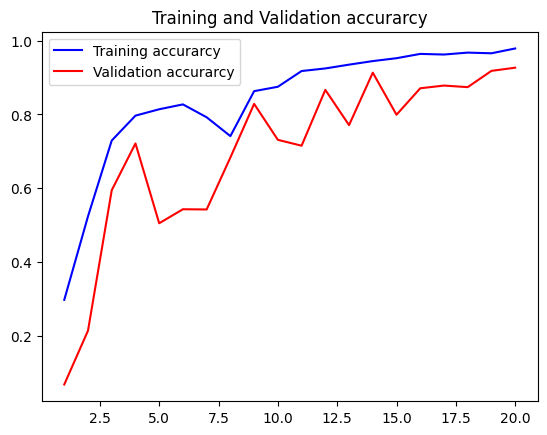

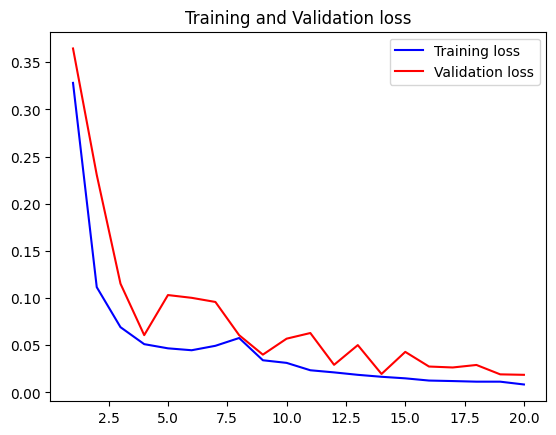

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()



In [17]:
print("Model Accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Model Accuracy
52/52 [==============================] - 47s 888ms/step - loss: 0.0187 - accuracy: 0.9265
Test Accuracy: 92.65156388282776


Accuracy is 92%

In [25]:
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(binarizer, f)

In [24]:
model.save("cnn.h5")

In [ ]:
def prepare_picture(img):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (264,264))   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None     